<a href="https://colab.research.google.com/github/mariobigai/redes-neurais/blob/feature%2Flista3/ELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código adaptado de [Bruno Adriano Menegoto](https://colab.research.google.com/drive/1LKeWENmnZ8vWcKAX9Kgo0hPEuh1Fp07r?usp=drive_link)

In [167]:
#Importando as bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [168]:
# Datasets
from sklearn.datasets import load_iris, load_wine
iris = load_iris()
wine = load_wine()

#Processo de modelagem dos dados

In [169]:
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
dataset = iris.data

entrada = dataset[:, 0 : -1].astype('float')
saida = iris.target
# saida

In [170]:
encoder = OneHotEncoder(sparse_output = False)
encoderPlot = LabelEncoder()

#Transforma as strings (Iris-Setosa, Iris-Versicolor, Iris-Virginica) -> (1, 2, 3)
#Porém é preciso deixa em outro formato, como se fosse neuronio ligado e desligado
# 1 0 0 --> Classe 1
# 0 1 0 --> Classe 2
# 0 0 1 --> Classe 3
dadosSaida = encoder.fit_transform(np.array(saida).reshape(-1, 1))
# dadosSaida

In [171]:
#Normalizacao da Entrada
#Normalizados entre -1 à 1
scaler = MinMaxScaler(feature_range = (-1, 1))

entradaNormalizada = scaler.fit_transform(entrada)

#Rede Neural

In [172]:
class ELM:
  def __init__(self, neuronioEntrada, neuronioOculto, neuronioSaida):
    self.neuronioEntrada = neuronioEntrada
    self.neuronioOculto = neuronioOculto
    self.neuronioSaida = neuronioSaida

    self.pesosEntradaOculta = np.random.uniform(-1, 1, (self.neuronioEntrada, self.neuronioOculto))
    self.biasOculta = np.random.uniform(size = [self.neuronioOculto])

    self.H = None #--> pesos camada oculta -- saida
    self.beta = None #--> bias camada saida

  def funcaoAtivacao(self, x, tipo = 'sigmoid'):
    if tipo == 'tanh':
      return np.tanh(x)
    elif tipo == 'relu':
      return np.maximum(0, x)
    elif tipo == 'sigmoid':
      return 1/(1 + np.exp(-x))

  def treinamento(self, entradaTreinamento, saidaTreinamento):
    x = entradaTreinamento.dot(self.pesosEntradaOculta) + self.biasOculta
    H = self.funcaoAtivacao(x, 'tanh')

    #Inversa Moore-Penrose
    invH = np.linalg.pinv(H)
    self.H = invH.dot(saidaTreinamento)
    self.beta = np.zeros(self.neuronioSaida)

    mse, acc = self.evaluate(entradasTreinamento, saidaTreinamento)

    return mse, acc

  def feedforward(self, entradaTeste):
    h = self.funcaoAtivacao(entradaTeste.dot(self.pesosEntradaOculta) + self.biasOculta, 'tanh')
    saidaPrevista = h.dot(self.H) + self.beta
    return saidaPrevista

  def evaluate(self, entradaTeste, saidaPretendida):
    saidaPrevista = self.feedforward(entradaTeste)

    saidaPrev = np.argmax(saidaPrevista, axis = -1)
    saidaPret = np.argmax(saidaPretendida, axis = -1)

    mse = mean_squared_error(saidaPret, saidaPrev)
    acc = np.sum(saidaPrev == saidaPret) / len(saidaPretendida)

    return mse, acc

#Plots dos boxplot e da matriz de confusão

In [173]:
def boxplot(resultadoMSETeste):
  plt.boxplot(resultadoMSETeste)
  plt.show()

#Iniciando a execução da rede #Metodo 1

In [174]:
neuronio = 40
contador = 0
resultadoMSETeste = []
resultadoMSETreino = []

print(f'{neuronio} Neurônios')
print(100*'=')

while contador < 10:

  entradasTreinamento, entradasTeste, saidaTreinamento, saidaTeste = train_test_split(entradaNormalizada, dadosSaida, test_size = 0.2)
  neuroniosCamadaEntrada = len(entradasTreinamento[0])
  neuroniosCamadaOculta = neuronio
  neuroniosCamadaSaida = len(saidaTeste[0])

  redeIris = ELM(neuroniosCamadaEntrada, neuroniosCamadaOculta, neuroniosCamadaSaida)
  mse_treino, acc_treino = redeIris.treinamento(entradasTreinamento, saidaTreinamento)
  resultadoMSETreino.append(mse_treino)

  mse, acc = redeIris.evaluate(entradasTeste, saidaTeste)
  resultadoMSETeste.append(mse)

  print(f'Run {contador}  ' + 100*'-')
  print(f'MSE - Treino: {np.round(mse_treino, 2)}')
  print(f'Acuracia - Treino: {np.round(acc_treino, 2) * 100}%')
  print(f'MSE - Teste: {np.round(acc, 2)}')
  print(f'Acuracia - Teste: {np.round(acc, 2) * 100}%')

  contador += 1

40 Neurônios
Run 0  ----------------------------------------------------------------------------------------------------
MSE - Treino: 0.02
Acuracia - Treino: 98.0%
MSE - Teste: 0.93
Acuracia - Teste: 93.0%
Run 1  ----------------------------------------------------------------------------------------------------
MSE - Treino: 0.03
Acuracia - Treino: 97.0%
MSE - Teste: 0.97
Acuracia - Teste: 97.0%
Run 2  ----------------------------------------------------------------------------------------------------
MSE - Treino: 0.02
Acuracia - Treino: 98.0%
MSE - Teste: 0.83
Acuracia - Teste: 83.0%
Run 3  ----------------------------------------------------------------------------------------------------
MSE - Treino: 0.02
Acuracia - Treino: 98.0%
MSE - Teste: 0.9
Acuracia - Teste: 90.0%
Run 4  ----------------------------------------------------------------------------------------------------
MSE - Treino: 0.04
Acuracia - Treino: 96.0%
MSE - Teste: 0.97
Acuracia - Teste: 97.0%
Run 5  -----------

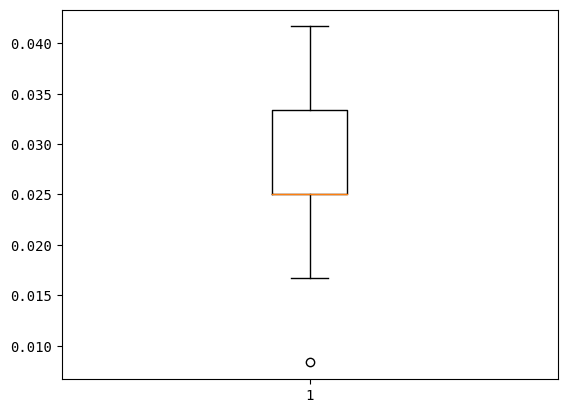

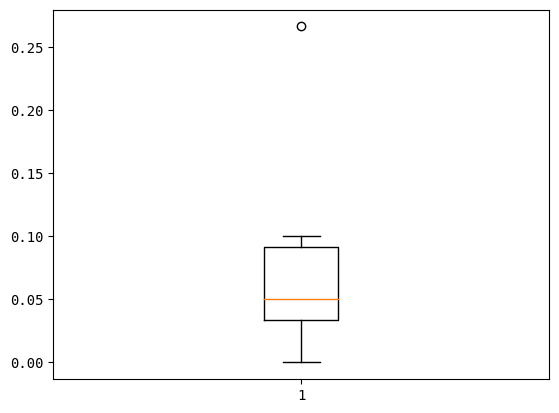

In [175]:
boxplot(resultadoMSETreino)
boxplot(resultadoMSETeste)

#Iniciando a execucao da rede #Metodo 2

In [160]:
lista_neuroniosCamadaOculta = [10, 20, 40, 80, 160]
resultadosMSETeste = [[] for _ in range(len(lista_neuroniosCamadaOculta))]
resultadosMSETreino = [[] for _ in range(len(lista_neuroniosCamadaOculta))]

for neuronio in range(len(lista_neuroniosCamadaOculta)):
  print(f'{lista_neuroniosCamadaOculta[neuronio]} Neurônios')
  print(100*'=')
  for execucao in range(10):
    resultadoMSE, resultadoACC = 0, 0

    entradasTreinamento, entradasTeste, saidaTreinamento, saidaTeste = train_test_split(entradaNormalizada, dadosSaida, test_size = 0.3)
    neuroniosCamadaEntrada = len(entradasTreinamento[0])
    neuroniosCamadaOculta = lista_neuroniosCamadaOculta[neuronio]
    neuroniosCamadaSaida = len(saidaTeste[0])

    redeIris = ELM(neuroniosCamadaEntrada, neuroniosCamadaOculta, neuroniosCamadaSaida)
    mse_treino, acc_treino = redeIris.treinamento(entradasTreinamento, saidaTreinamento)
    mse_teste, acc_teste = redeIris.evaluate(entradasTeste, saidaTeste)

    resultadosMSETreino[neuronio].append(mse_treino)
    resultadosMSETeste[neuronio].append(mse_teste)

    print(f'Run {execucao}  ' + 100*'-')
    print(f'MSE - Treino: {np.round(mse_treino, 2)}')
    print(f'Acuracia - Treino: {np.round(acc_treino, 2) * 100}%')
    print(f'MSE - Teste: {np.round(acc, 2)}')
    print(f'Acuracia - Teste: {np.round(acc, 2) * 100}%')
  print(100*'=')


10 Neurônios
Run 0  ----------------------------------------------------------------------------------------------------
MSE - Treino: 0.1
Acuracia - Treino: 90.0%
MSE - Teste: 0.97
Acuracia - Teste: 97.0%
Run 1  ----------------------------------------------------------------------------------------------------
MSE - Treino: 0.06
Acuracia - Treino: 94.0%
MSE - Teste: 0.97
Acuracia - Teste: 97.0%
Run 2  ----------------------------------------------------------------------------------------------------
MSE - Treino: 0.05
Acuracia - Treino: 95.0%
MSE - Teste: 0.97
Acuracia - Teste: 97.0%
Run 3  ----------------------------------------------------------------------------------------------------
MSE - Treino: 0.03
Acuracia - Treino: 97.0%
MSE - Teste: 0.97
Acuracia - Teste: 97.0%
Run 4  ----------------------------------------------------------------------------------------------------
MSE - Treino: 0.06
Acuracia - Treino: 94.0%
MSE - Teste: 0.97
Acuracia - Teste: 97.0%
Run 5  -----------

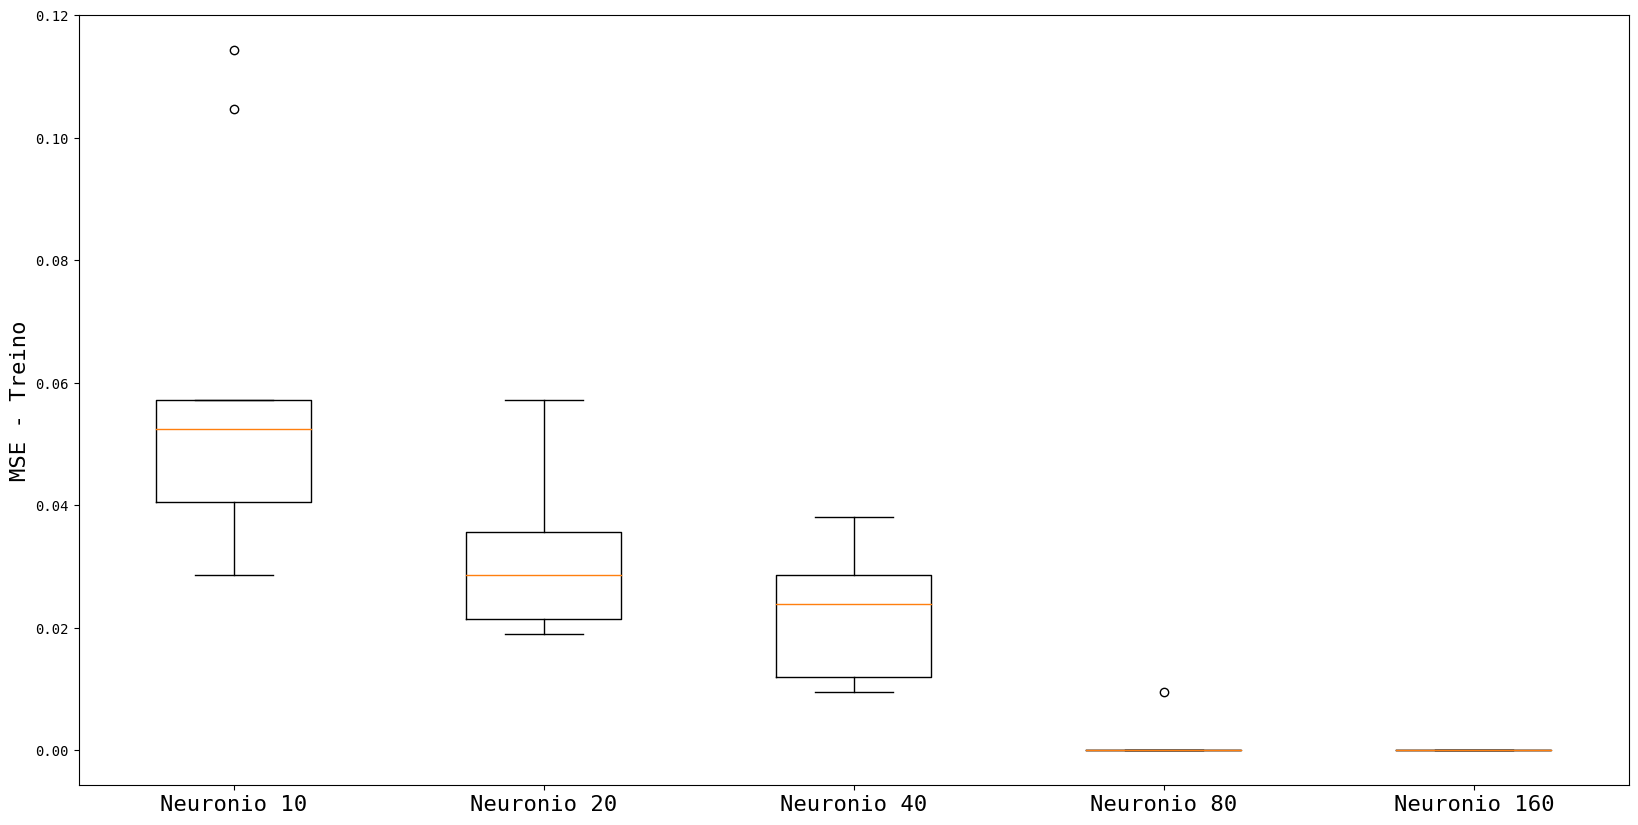

In [161]:
fig, ax = plt.subplots(figsize = (20, 10))

ax.boxplot(resultadosMSETreino)
ax.set_xticklabels([f'Neuronio {lista_neuroniosCamadaOculta[0]}', f'Neuronio {lista_neuroniosCamadaOculta[1]}', f'Neuronio {lista_neuroniosCamadaOculta[2]}', f'Neuronio {lista_neuroniosCamadaOculta[3]}', f'Neuronio {lista_neuroniosCamadaOculta[4]}'], fontsize = 16)
ax.set_ylabel('MSE - Treino', fontsize = 16)

plt.show()

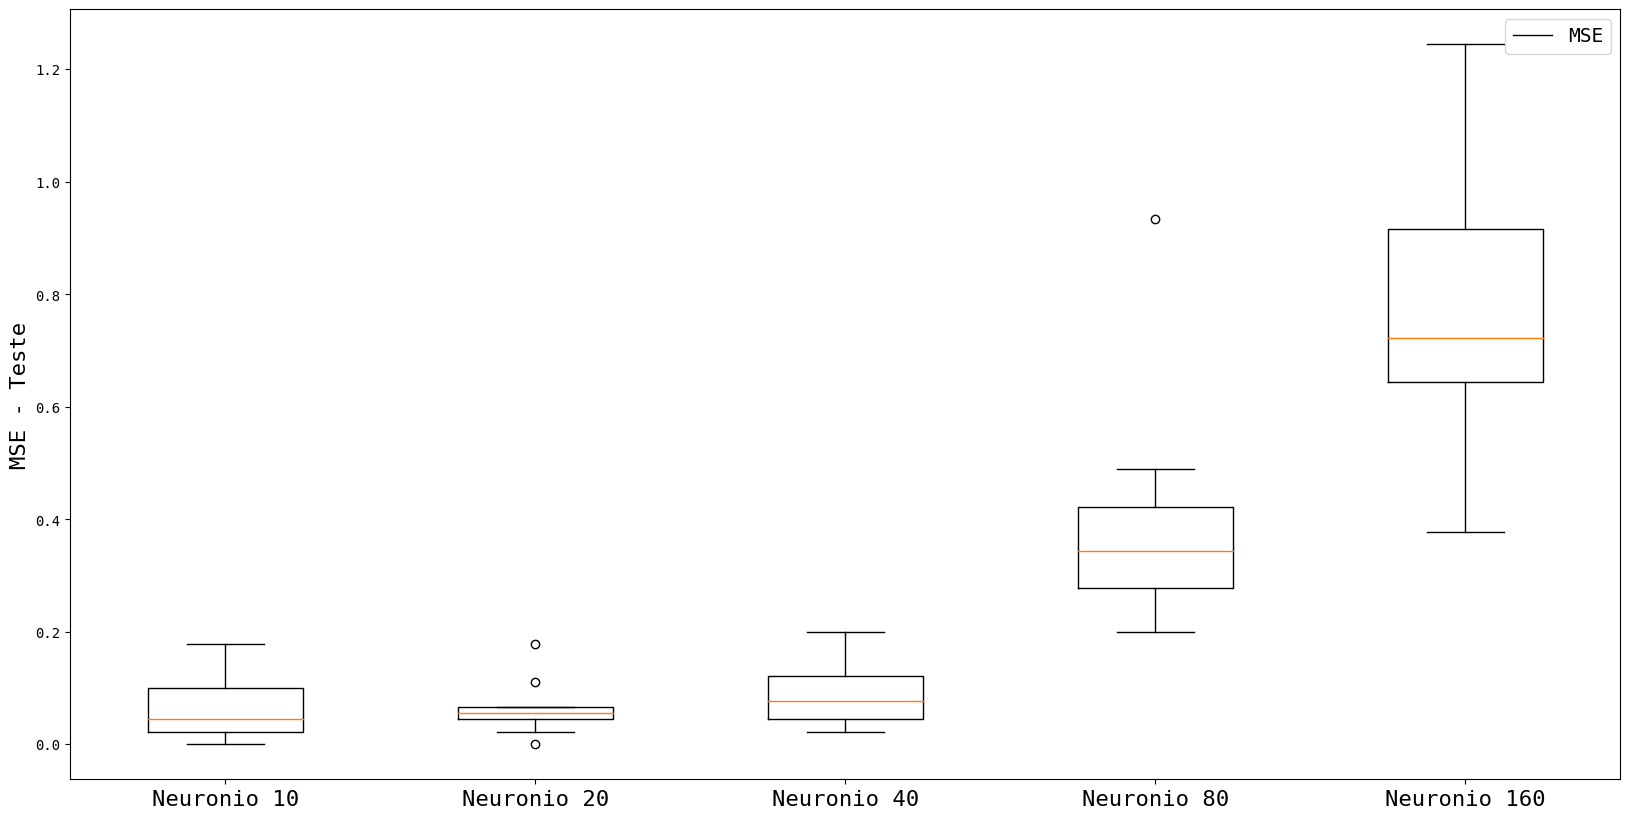

In [162]:
fig, ax = plt.subplots(figsize = (20, 10))

ax.boxplot(resultadosMSETeste)
ax.set_xticklabels([f'Neuronio {lista_neuroniosCamadaOculta[0]}', f'Neuronio {lista_neuroniosCamadaOculta[1]}', f'Neuronio {lista_neuroniosCamadaOculta[2]}', f'Neuronio {lista_neuroniosCamadaOculta[3]}', f'Neuronio {lista_neuroniosCamadaOculta[4]}'], fontsize = 16)
ax.set_ylabel('MSE - Teste', fontsize = 16)
ax.legend(['MSE'], loc = 'upper right', fontsize = 14)

plt.show()